Car Price Prediction

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [73]:
df=pd.read_csv(r'C:\Users\Monica Luna\Desktop\Curso ML\Pandas\car_data.csv')

In [75]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [79]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [83]:
df.shape

(4340, 8)

In [85]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [87]:
print(df.fuel.value_counts())
print(df.transmission.value_counts())
print(df.seller_type.value_counts())
print(df.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [89]:
# Encoding data - Usamos en este caso Label encoder
label=LabelEncoder()
df['fuel']=label.fit_transform(df['fuel']) # en vez de labelEncoder--> df.replace({'fuel':{'Diesel':0,'Petrol':1,....}},inplace=True)
df['seller_type']=label.fit_transform(df['seller_type'])
df['transmission']=label.fit_transform(df['transmission'])
df['owner']=label.fit_transform(df['owner'])

In [91]:
# comprobamos el enconding
print(df.fuel.value_counts())
print(df.transmission.value_counts())
print(df.seller_type.value_counts())
print(df.owner.value_counts())

fuel
1    2153
4    2123
0      40
3      23
2       1
Name: count, dtype: int64
transmission
1    3892
0     448
Name: count, dtype: int64
seller_type
1    3244
0     994
2     102
Name: count, dtype: int64
owner
0    2832
2    1106
4     304
1      81
3      17
Name: count, dtype: int64


In [93]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [95]:
# dividimos datos
X=df.iloc[:,[i for i in range(7) if i not in [0,2]]] # igual a X=df.drop(['name','selling_price'].index=True)
y=df['selling_price']

In [97]:
X

,year,km_driven,fuel,seller_type,transmission
0,2007,70000,4,1,1
1,2007,50000,4,1,1
2,2012,100000,1,1,1
3,2017,46000,4,1,1
4,2014,141000,1,1,1
...,...,...,...,...,...
4335,2014,80000,1,1,1
4336,2014,80000,1,1,1
4337,2009,83000,4,1,1
4338,2016,90000,1,1,1


In [99]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [101]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [103]:
# entrenamos modelo de regresión lineal
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [105]:
# predcition of training data
X_train_pred=model.predict(X_train)

In [107]:
# evaluación
r2_error=metrics.r2_score(y_train,X_train_pred)
print(r2_error)

0.4402968859747205


In [111]:
X_test_pred=model.predict(X_test)
r2_error_test=metrics.r2_score(y_test,X_test_pred)
print(r2_error_test)

0.4843023569543624


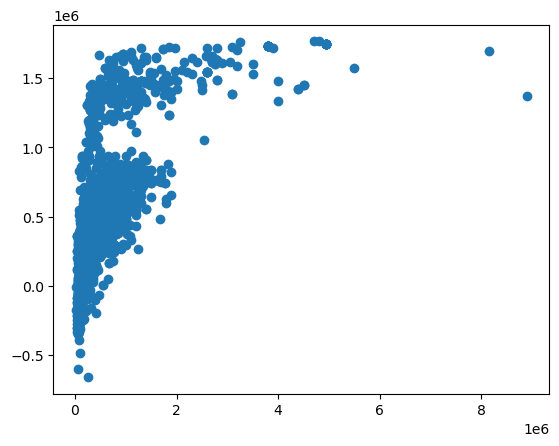

In [117]:
# plot
plt.scatter(y_train,X_train_pred) # no obtenemos buena prediccion

In [119]:
# Lasso Regression

In [121]:
# entrenamos modelo de regresión lasso
model_lasso=Lasso()
model_lasso.fit(X_train,y_train)

Lasso()

In [123]:
# predcition of training data
X_train_pred=model_lasso.predict(X_train)

In [125]:
# evaluación
r2_error=metrics.r2_score(y_train,X_train_pred)
print(r2_error)

0.4402968859351586


In [127]:
X_test_pred=model_lasso.predict(X_test)
r2_error_test=metrics.r2_score(y_test,X_test_pred)
print(r2_error_test)

0.48430297355791696


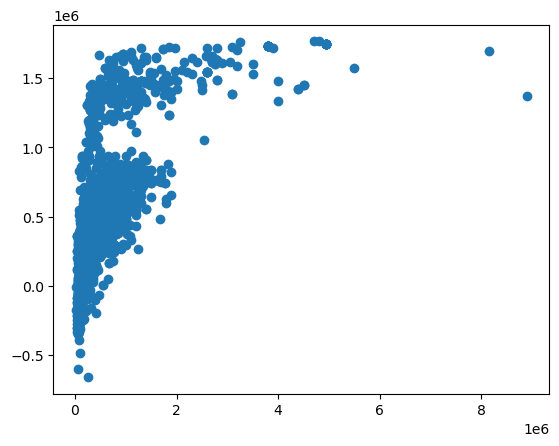

In [129]:
# plot
plt.scatter(y_train,X_train_pred) # no obtenemos buena prediccion